In [20]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
os.chdir('data')

In [3]:
[file for file in os.listdir() if(file.endswith('.csv'))]

['Median Incomes.csv',
 'Median Monthly Rent.csv',
 'Home Ownership.csv',
 'Total Population.csv',
 'Uninsured.csv',
 'Unemployment Rate.csv',
 'Severe Rent Burden.csv',
 'Educational Attainment.csv',
 'Overcrowded Rental Housing.csv',
 'SNAP (Food Stamps).csv',
 'Household Income.csv',
 'Public Assistance.csv',
 'Employment Population Ratio.csv',
 'Total Population by Race_Ethnicity.csv']

In [4]:
dfs = {}
for file in os.listdir():
    if (file.endswith('.csv')):
        key = file[:-4].replace(' ', '_').lower()
        #print(key)
        dfs[key] = pd.read_csv(file, skiprows=4, encoding='utf8', low_memory=False)
        #print(f"{key} - {sorted(set(dfs[key]['TimeFrame'].tolist()))}")

In [ ]:
dfs.keys()

In [ ]:
for key in dfs.keys():
    print(f'{key} - {dfs[key].columns.tolist()}')
    print(sorted(dfs[key]['TimeFrame'].value_counts().index))

In [ ]:
for key in dfs.keys():
    if('Number' in list(set(dfs[key]['DataFormat'].tolist())) ):
        print(key)
        

In [5]:
standard = {}
extra = {}
for key in dfs.keys():
    if(dfs[key].columns[1] == 'TimeFrame' and key != 'public_assistance'):
        print(f'{key} - {dfs[key].columns.tolist()}')
        standard[key] = dfs[key]
        if(key == 'total_population'):
            standard[key] = dfs[key][~dfs[key].Fips.str.contains('uhf')]
            standard[key].Fips = standard[key].Fips.astype(int)
        if(key == 'median_monthly_rent'):
            standard[key]['DataFormat'] = 'Number'
    else:
        extra[key] = dfs[key]
    #print(dfs[key].head(2))

median_monthly_rent - ['Location', 'TimeFrame', 'DataFormat', 'Data', 'Fips']
home_ownership - ['Location', 'TimeFrame', 'DataFormat', 'Data', 'Fips']
total_population - ['Location', 'TimeFrame', 'DataFormat', 'Data', 'Fips']
unemployment_rate - ['Location', 'TimeFrame', 'DataFormat', 'Data', 'Fips']
severe_rent_burden - ['Location', 'TimeFrame', 'DataFormat', 'Data', 'Fips']
overcrowded_rental_housing - ['Location', 'TimeFrame', 'DataFormat', 'Data', 'Fips']
employment_population_ratio - ['Location', 'TimeFrame', 'DataFormat', 'Data', 'Fips']


/Users/tavares/opt/anaconda3/envs/PythonML/lib/python3.6/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [6]:
print('standard: ', list(standard.keys()))
print('')
print('extra: ', list(extra.keys()))

standard:  ['median_monthly_rent', 'home_ownership', 'total_population', 'unemployment_rate', 'severe_rent_burden', 'overcrowded_rental_housing', 'employment_population_ratio']

extra:  ['median_incomes', 'uninsured', 'educational_attainment', 'snap_(food_stamps)', 'household_income', 'public_assistance', 'total_population_by_race_ethnicity']


In [7]:
df = standard['median_monthly_rent'][['TimeFrame','Fips','Location']]

In [8]:
df = df.merge(standard['total_population'][['TimeFrame','Fips','Data']].rename(columns={'Data':'Population'}),on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)

In [9]:
df = df.merge(standard['median_monthly_rent'][['TimeFrame','Fips','Data']].rename(columns={'Data':'Median_Rent'}),on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)

In [10]:
df = df.merge(standard['severe_rent_burden'][['TimeFrame','Fips','Data']].rename(columns={'Data':'Rent_Burden'}),on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)
df = df.merge(standard['overcrowded_rental_housing'][['TimeFrame','Fips','Data']].rename(columns={'Data':'Overcrowded'}),on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)

In [11]:
df = df.merge(standard['home_ownership'][['TimeFrame','Fips','Data']].rename(columns={'Data':'Owner'}),on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)

In [12]:
df = df.merge(standard['employment_population_ratio'][['TimeFrame','Fips','Data']].rename(columns={'Data':'Employment_Ratio'}),on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)
df = df.merge(standard['unemployment_rate'][['TimeFrame','Fips','Data']].rename(columns={'Data':'Unemployment'}),on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)

In [ ]:
print(df.shape)
df.head()

In [ ]:
for key in extra:
    print(f'{key} - {extra[key].columns.tolist()}')

In [13]:
median_incomes = extra['median_incomes'][
    (extra['median_incomes']['Household Type']=='All Households')
    &
    (extra['median_incomes'].Fips < 1000)
]
median_incomes = median_incomes[['TimeFrame','Fips','DataFormat','Data']].set_index(['TimeFrame','Fips','DataFormat']).unstack()
median_incomes.columns = ['Median_Income']
#median_incomes['Type'] = 'median_income'
median_incomes = median_incomes.reset_index()
print(median_incomes.shape)
median_incomes.head()
df = df.merge(median_incomes,on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)

(826, 3)


In [14]:
uninsured = extra['uninsured'][
    (extra['uninsured']['Age Group']=='All Ages')
    &
    (extra['uninsured'].DataFormat=='Number')
    &
    (extra['uninsured'].Fips < 1000)
]
#uninsured = uninsured[['TimeFrame','Fips','DataFormat','Data']].set_index(['TimeFrame','Fips','DataFormat']).unstack()
#uninsured.columns = ['Uninsured_No','Uninsured_Pct']
#uninsured['Type'] = 'uninsured'
#uninsured = uninsured.reset_index()
uninsured = uninsured[['TimeFrame', 'Fips', 'Data']].rename(columns={'Data': 'Uninsured'})
print(uninsured.shape)
uninsured.head()
df = df.merge(uninsured,on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)

(649, 3)


In [15]:
education = extra['educational_attainment']
education = education[['TimeFrame','Fips','Education Level','DataFormat','Data']]
education = education[
    (education['Education Level'].str.contains('Bachelor'))
    &
    (education['DataFormat']=='Number')
]
education = education.set_index(['TimeFrame','Fips','Education Level']).unstack()['Data'].reset_index()
education = education.rename(columns={'Bachelor\'s Degree or Higher': 'College'})
#education.columns = ['Education_No','Education_Pct']
#education['Type'] = 'education'
#education = education.reset_index().rename(columns={'Education Level': 'Education_Level'})
print(education.shape)
education.head()
df = df.merge(education,on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)

(845, 3)


In [ ]:
snap = extra['snap_(food_stamps)'][
    (extra['snap_(food_stamps)']['Recipient']=='Households')
    &
    (extra['snap_(food_stamps)'].DataFormat=='Number')
    &
    (extra['snap_(food_stamps)'].Fips < 1000)
]
snap = snap[['TimeFrame','Fips','Data']].rename(columns={'Data': 'Snap'})
#snap = snap[['TimeFrame','Fips','DataFormat','Data']].set_index(['TimeFrame','Fips','DataFormat']).unstack()
#snap.columns = ['Snap_No','Snap_Pct']
#snap['Type'] = 'snap'
#snap = snap.reset_index()
print(snap.shape)
print(sorted(set(snap.TimeFrame.tolist())))
snap.head()
#df = df.merge(snap,on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)

In [ ]:
#df.to_csv('../data.csv')

In [ ]:
print(df.shape)
df.head()

In [16]:
households = extra['household_income'][
    (extra['household_income'].DataFormat=='Number')
    &
    (extra['household_income'].Fips < 1000)
]


households = households[['TimeFrame','Fips','Income Level','Data']].set_index(['TimeFrame','Fips','Income Level'])\
    .unstack()['Data'].reset_index()
print(households.shape)
households.head(2)

df = df.merge(households,on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)
                
                

(826, 10)


In [ ]:
households = extra['household_income']
households = households[['TimeFrame','Fips','Income Level','DataFormat','Data']].set_index(['TimeFrame','Fips','Income Level','DataFormat']).unstack()
households.columns = ['Income_No','Income_Pct']
#households['Type'] = 'household_income'
households = households.reset_index().rename(columns={'Income Level': 'Income_Level'})
print(households.shape)
households.head()
df = df.merge(households,on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)

In [ ]:
public_assistance = extra['public_assistance']
public_assistance = public_assistance[['TimeFrame','Fips','DataFormat','Data']].set_index(['TimeFrame','Fips','DataFormat']).unstack()
public_assistance.columns = ['PA_No','PA_Pct']
#public_assistance['Type'] = 'public_assistance'
public_assistance = public_assistance.reset_index()
print(public_assistance.shape)
public_assistance.head()
df = df.merge(public_assistance,on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)

In [ ]:
pop_by_race = extra['total_population_by_race_ethnicity']
pop_by_race = pop_by_race[['TimeFrame','Fips','Race/Ethnicity','DataFormat','Data']].set_index(['TimeFrame','Fips','Race/Ethnicity','DataFormat']).unstack()
pop_by_race.columns = ['Race_No','Race_Pct']
#pop_by_race['Type'] = 'population_by_race'
pop_by_race = pop_by_race.reset_index().rename(columns={'Race/Ethnicity': 'Race'})
print(pop_by_race.shape)
pop_by_race.head()
df = df.merge(pop_by_race,on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)

In [17]:
pop_by_race = extra['total_population_by_race_ethnicity'][
    (extra['total_population_by_race_ethnicity'].DataFormat=='Number')
    &
    (extra['total_population_by_race_ethnicity'].Fips < 1000)
]


pop_by_race = pop_by_race[['TimeFrame','Fips','Race/Ethnicity','Data']].set_index(['TimeFrame','Fips','Race/Ethnicity'])\
    .unstack()['Data'].reset_index()
print(pop_by_race.shape)
pop_by_race.head(2)

df = df.merge(pop_by_race,on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)


(590, 7)


In [ ]:
pop_by_race#.index.name = None

In [ ]:
sorted(pop_by_race['TimeFrame'].value_counts().index)

In [ ]:
print(df.shape)
print(sorted(df['TimeFrame'].value_counts().index))
print(df.columns.tolist())
df.head(10)

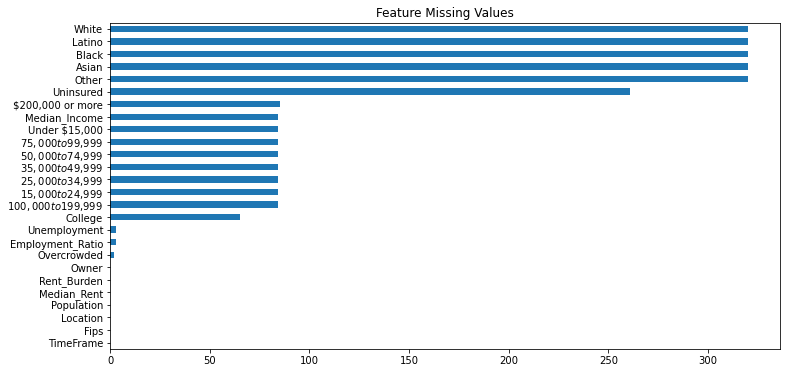

In [27]:
df.isnull().sum().sort_values(ascending=True).plot.barh(orientation='horizontal', figsize=(12,6))
plt.title('Feature Missing Values')
plt.show()

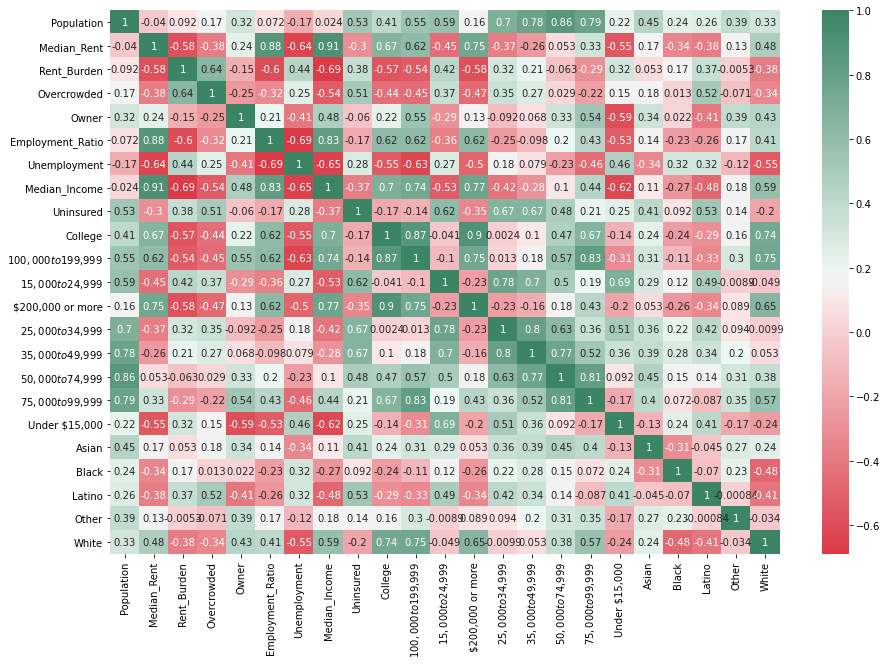

In [28]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
corrMatrix = df[df.columns[3:]].dropna().corr()
plt.figure(figsize=(15,10))
colormap=sn.diverging_palette(10, 150,as_cmap=True)
sn.heatmap(corrMatrix, annot=True, cmap=colormap)
plt.show()

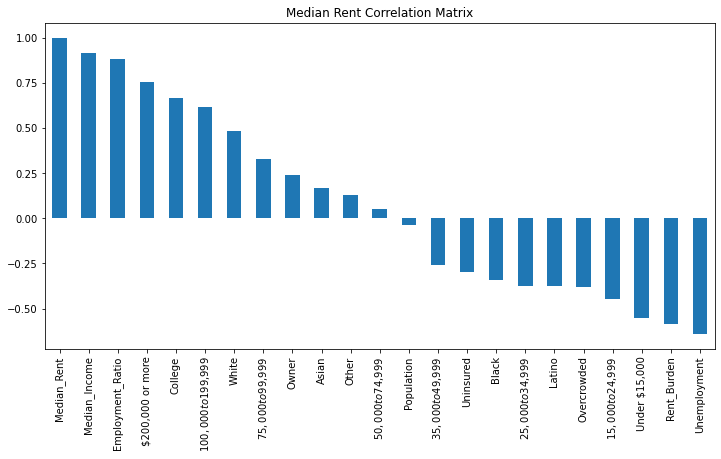

In [30]:
corrMatrix['Median_Rent'].sort_values(ascending=False).plot.bar(figsize=(12,6))
plt.title('Median Rent Correlation Matrix')
plt.show()

In [ ]:
"""
median_incomes - 2005-2018
monthly_rent - 2009-2018
arrests - 2000-2019
child_population_by_race_ethnicity - 2005-2018
median_monthly_rent - 2005-2018
home_ownership - 2005-2018
total_population - 2005-2018
child_population - 2005-2018
uninsured - 2008-2018
public_assistance_by_program_type - 2005-2017
unemployment_rate_ - 2005-2018
severe_rent_burden - 2005- 2018
educational_attainment - 2006-2018
overcrowded_rental_housing - 2005-2018
snap_(food_stamps) - 2001-2019
household_income - 2005-2018
public_assistance - 2005-2017
employment_population_ratio - 2005-2018
total_population_by_race_ethnicity - 2009-2018
"""

In [ ]:
#df.to_csv('../data.csv')

In [ ]:
print(df.shape)
#d = df[['TimeFrame','Fips','Rent','Income_Level','Income_No','Race','Race_No','Rent_Burden','Employment_Ratio']].drop_duplicates().dropna()
d = df.drop(['Fips'],axis=1).drop_duplicates().dropna().reset_index(drop=True)
d.Population = d.Population.round(2)
print(d.shape)
d.head(2)

In [ ]:
d.info()

In [ ]:
df.describe()

In [ ]:
print('Count of Missing Values')
df.isnull().sum().sort_values(ascending=False)

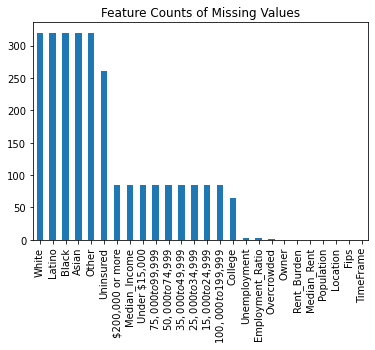

In [31]:
df.isnull().sum().sort_values(ascending=False).plot.bar()
plt.title('Feature Counts of Missing Values')
plt.show()

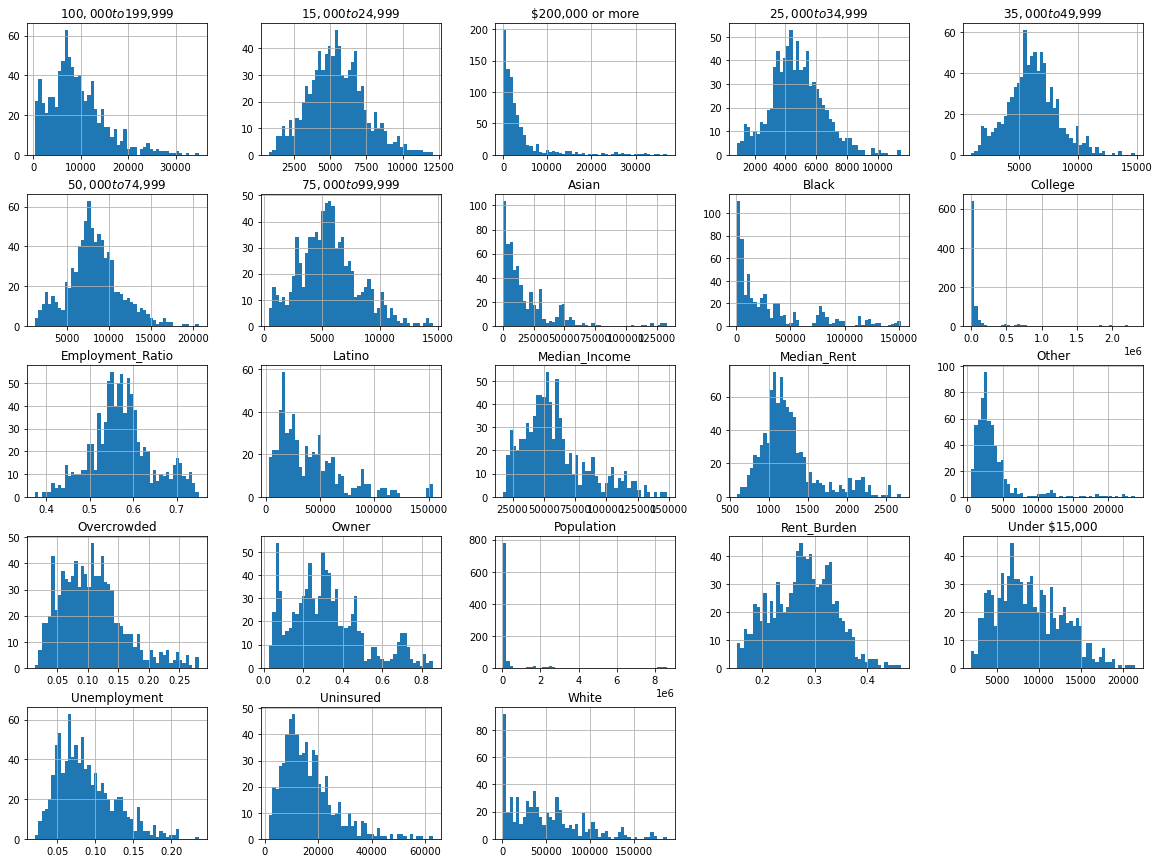

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
df[df.columns[2:]].hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
col = 'Median_Rent'
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
sn.distplot(d[col],hist=True,kde=True,rug=False,label=col,norm_hist=True)
plt.title('Original Median Rent Histogram')
plt.show()

In [ ]:
bins=[0.,14999.0,24999.0,34999.0,49999.0,74999.0,99999.0,199999.0,np.inf]
print(bins)

In [ ]:
labels=[
    'Under $15,000',
    '$15,000 to $24,999',
    '$25,000 to $34,999',
    '$35,000 to $49,999',
    '$50,000 to $74,999',
    '$75,000 to $99,999',
    '$100,000 to $199,999',
    '$200,000 or more'
    ]
print(labels)

In [ ]:
levels = pd.cut(df['Median_Income'],bins=bins,labels=labels)

levels.hist()
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.columns

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ['Median_Rent', 'Median_Income', 'White', 'Latino','Black']
attributes = ['Median_Rent', 'Median_Income', '$200,000 or more', 'Under $15,000']
#attributes = df.columns[3:]

scatter_matrix(df[attributes], figsize=(16,8))

plt.show()

In [ ]:
df.plot(kind='scatter', 
              x='Unemployment', 
              y='Median_Rent', 
              alpha=0.3)

plt.show()

In [ ]:
df2 = strat_train_set[['TimeFrame',
           'Fips',
           'Population',
           'Rent_Burden',
           'Median_Income',
           'Employment_Ratio',
           'Unemployment']]
df2_labels = strat_train_set['Rent'].copy()

In [ ]:
print(df2.shape)
df2.head(2)

## Data Cleaning

In [ ]:
# Replacing missing values with the median
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df2 = df[['Rent','Population',
           'Rent_Burden',
           'Median_Income',
           'Employment_Ratio',
           'Unemployment']]
imputer.fit(df2)
print(imputer.statistics_)
X = imputer.transform(df2)
df_tr = pd.DataFrame(X, columns=df2.columns, index=df2.index)
df_tr.head()

### Machine Learning Algorithm

### Simple Linear Regression 1

In [33]:
# Assign the data to X and y
col = 'Median_Income'
columns = ['Median_Rent',col]
#columns = ['Rent','Population','Rent_Burden','Median_Income','Employment_Ratio', 'Unemployment']
d = df[columns].dropna()
X = d[columns[1:]]
y = d['Median_Rent'].values.reshape(-1, 1)
print(X.shape, y.shape)

(826, 1) (826, 1)


In [34]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(660, 1)
(166, 1)


In [35]:
# Create a simple 1 variable model using LinearRegression

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [36]:
# Fit the model to the training data and calculate the scores for the training and testing data

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.8183668872137477
Testing Score: 0.7623454118189358


Text(0.5, 1.0, 'Residual Plot')

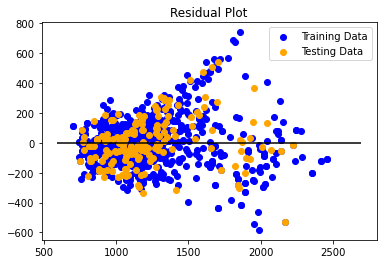

In [37]:
# Plot the Residuals for the Training and Testing data
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")


### StandardScaler

In [38]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [39]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

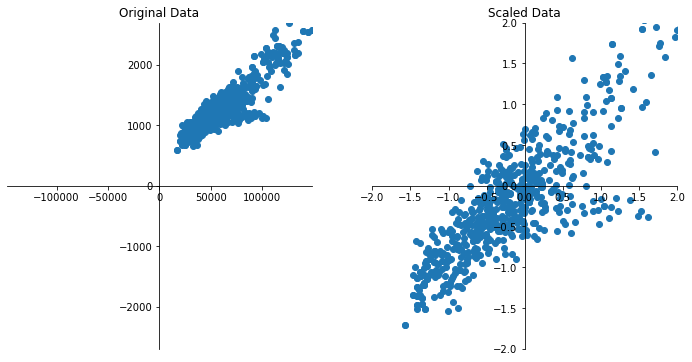

In [40]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train[col].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train[col], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

plt.show()

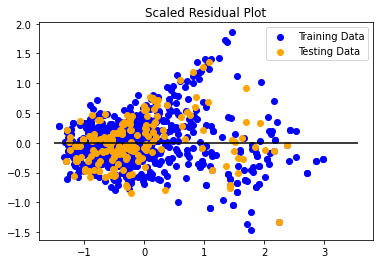

In [41]:
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Scaled Residual Plot")
plt.show()

In [42]:
# Quantify the model using the scaled data
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.17620846105678767, R2: 0.7623454118189357


### Simple Linear Regression 2

In [43]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [44]:
df.columns

Index(['TimeFrame', 'Fips', 'Location', 'Population', 'Median_Rent',
       'Rent_Burden', 'Overcrowded', 'Owner', 'Employment_Ratio',
       'Unemployment', 'Median_Income', 'Uninsured', 'College',
       '$100,000 to $199,999', '$15,000 to $24,999', '$200,000 or more',
       '$25,000 to $34,999', '$35,000 to $49,999', '$50,000 to $74,999',
       '$75,000 to $99,999', 'Under $15,000', 'Asian', 'Black', 'Latino',
       'Other', 'White'],
      dtype='object')

In [45]:
col = 'Unemployment'
train_data,test_data=train_test_split(df.fillna(0),train_size=0.8,random_state=3)
reg=linear_model.LinearRegression()
x_train=np.array(train_data[col]).reshape(-1,1)
y_train=np.array(train_data['Median_Rent']).reshape(-1,1)
reg.fit(x_train,y_train)

x_test=np.array(test_data[col]).reshape(-1,1)
y_test=np.array(test_data['Median_Rent']).reshape(-1,1)
pred=reg.predict(x_test)
print('linear model')
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('Sqaured mean error', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(reg.score(x_train,y_train),3))
print('R sqaured testing',round(reg.score(x_test,y_test),3) )
print('intercept',reg.intercept_)
print('coefficient',reg.coef_)

linear model
Sqaured mean error 313.48
R squared training 0.336
R sqaured testing 0.326
intercept [1756.47359501]
coefficient [[-5662.06367613]]


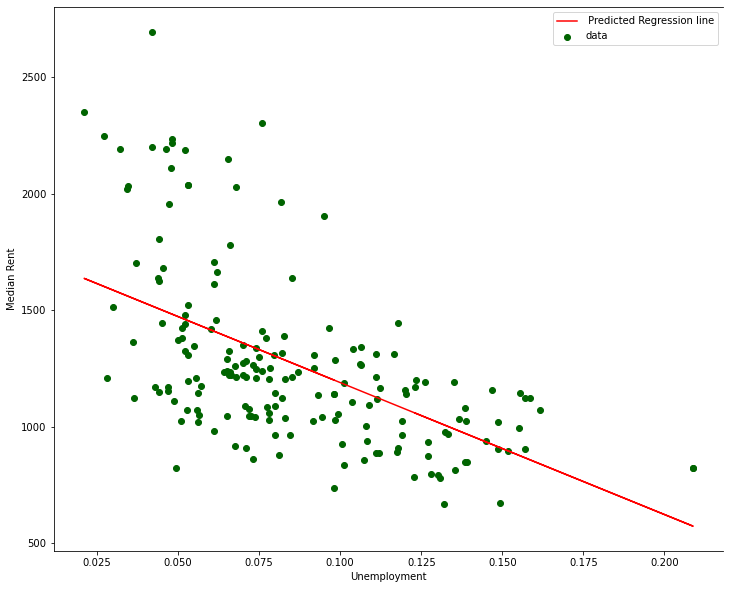

In [46]:
_, ax = plt.subplots(figsize= (12, 10))
plt.scatter(x_test, y_test, color= 'darkgreen', label = 'data')
plt.plot(x_test, reg.predict(x_test), color='red', label= ' Predicted Regression line')
plt.xlabel(col)
plt.ylabel('Median Rent')
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [ ]:
array[0,0:23]

In [47]:
# Rescale Data
from sklearn.preprocessing import MinMaxScaler
array = df[df.columns[3:]].fillna(0).values
cols = len(df.columns[3:].tolist())
# separate array into input and output components
X = array[:,0:cols]
#Y = array[:,cols]
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(X)
# summarize transformed data
np.set_printoptions(precision=3)
print(rescaledX[0:5,:])


[[8.520e-04 7.605e-01 7.886e-02 1.346e-01 2.808e-01 1.000e+00 1.399e-01
  7.877e-01 0.000e+00 0.000e+00 2.303e-01 1.146e-01 1.361e-01 1.043e-01
  1.816e-01 1.855e-01 1.881e-01 1.298e-01 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00]
 [3.691e-03 7.605e-01 7.886e-02 1.346e-01 2.808e-01 1.000e+00 1.399e-01
  7.877e-01 0.000e+00 0.000e+00 3.400e-01 1.692e-01 2.009e-01 1.540e-01
  2.681e-01 2.739e-01 2.777e-01 1.916e-01 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00]
 [1.186e-02 1.078e-01 2.758e-01 2.893e-01 1.320e-01 7.510e-01 3.731e-01
  2.716e-01 0.000e+00 0.000e+00 1.992e-01 6.775e-01 4.651e-02 6.550e-01
  4.409e-01 5.334e-01 3.954e-01 9.487e-01 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00]
 [5.235e-03 5.658e-01 1.323e-01 1.539e-01 2.145e-01 9.015e-01 2.798e-01
  5.981e-01 0.000e+00 0.000e+00 2.965e-01 3.065e-01 2.024e-01 2.658e-01
  3.785e-01 3.444e-01 4.245e-01 3.497e-01 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00]
 [6.750e-05 5.658e-01 1.323e-01 1.539e-01 2.

In [48]:
d2 = pd.DataFrame(rescaledX, columns=df.columns[3:].tolist())
print(d2.shape)
d2.head()

(910, 23)


,Population,Median_Rent,Rent_Burden,Overcrowded,Owner,Employment_Ratio,Unemployment,Median_Income,Uninsured,College,...,"$25,000 to $34,999","$35,000 to $49,999","$50,000 to $74,999","$75,000 to $99,999","Under $15,000",Asian,Black,Latino,Other,White
0,0.000852,0.760514,0.078857,0.134606,0.280822,1.000000,0.139914,0.787728,0.0,0.0,...,0.104342,0.181606,0.185519,0.188145,0.129787,0.0,0.0,0.0,0.0,0.0
1,0.003691,0.760514,0.078857,0.134606,0.280822,1.000000,0.139914,0.787728,0.0,0.0,...,0.154030,0.268087,0.273864,0.277740,0.191592,0.0,0.0,0.0,0.0,0.0
2,0.011856,0.107770,0.275759,0.289257,0.131971,0.750999,0.373103,0.271623,0.0,0.0,...,0.654953,0.440853,0.533359,0.395392,0.948678,0.0,0.0,0.0,0.0,0.0
3,0.005235,0.565793,0.132322,0.153942,0.214517,0.901465,0.279827,0.598124,0.0,0.0,...,0.265755,0.378535,0.344365,0.424466,0.349719,0.0,0.0,0.0,0.0,0.0
4,0.000067,0.565793,0.132322,0.153942,0.214517,0.901465,0.279827,0.598124,0.0,0.0,...,0.133007,0.189452,0.172351,0.212440,0.175031,0.0,0.0,0.0,0.0,0.0


In [49]:
# Standardize Data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
array = df[df.columns[3:]].fillna(0).values
# separate array into input and output components
X = array[:,0:cols]
#Y = array[:,cols]
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
# summarize transformed data
np.set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[-0.305  2.488 -1.702 -1.314 -0.306  2.291 -1.447  2.063 -1.039 -0.329
  -0.062 -1.463  0.263 -1.464 -1.075 -0.963 -0.809 -1.175 -0.626 -0.629
  -0.848 -0.743 -0.783]
 [-0.283  2.488 -1.702 -1.314 -0.306  2.291 -1.447  2.063 -1.039 -0.329
   0.553 -1.195  0.676 -1.195 -0.6   -0.48  -0.36  -0.881 -0.626 -0.629
  -0.848 -0.743 -0.783]
 [-0.219 -1.183 -0.657 -0.479 -0.971 -0.107  0.01  -0.447 -1.039 -0.329
  -0.237  1.305 -0.309  1.513  0.349  0.937  0.23   2.723 -0.626 -0.629
  -0.848 -0.743 -0.783]
 [-0.271  1.393 -1.419 -1.209 -0.602  1.342 -0.573  1.141 -1.039 -0.329
   0.309 -0.52   0.686 -0.591  0.007 -0.095  0.376 -0.128 -0.626 -0.629
  -0.848 -0.743 -0.783]
 [-0.311  1.393 -1.419 -1.209 -0.602  1.342 -0.573  1.141 -1.039 -0.329
  -0.522 -1.273  0.04  -1.309 -1.032 -1.035 -0.688 -0.96  -0.626 -0.629
  -0.848 -0.743 -0.783]]


### Visualize Box Plot

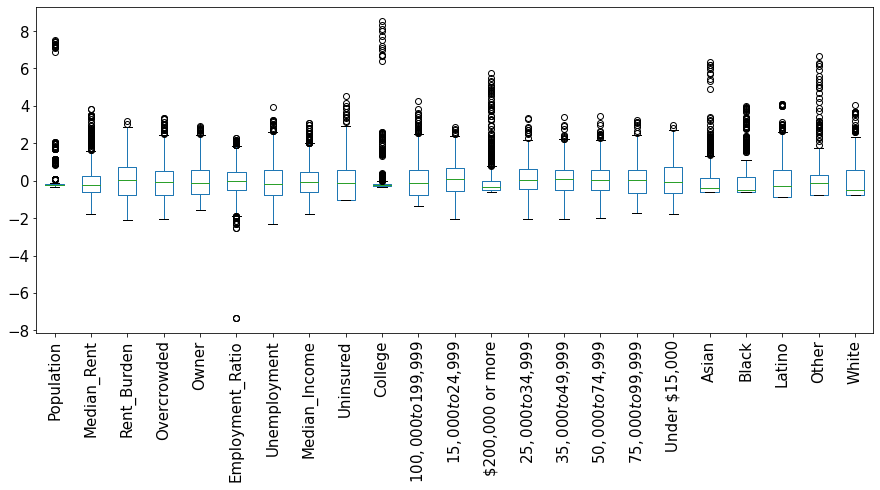

In [50]:
data = pd.DataFrame(rescaledX, columns=df.columns[3:].tolist())
data.boxplot(grid=False, fontsize=15, figsize=(15,6))
plt.xticks(rotation=90)
plt.show()

### Correlation Matrix

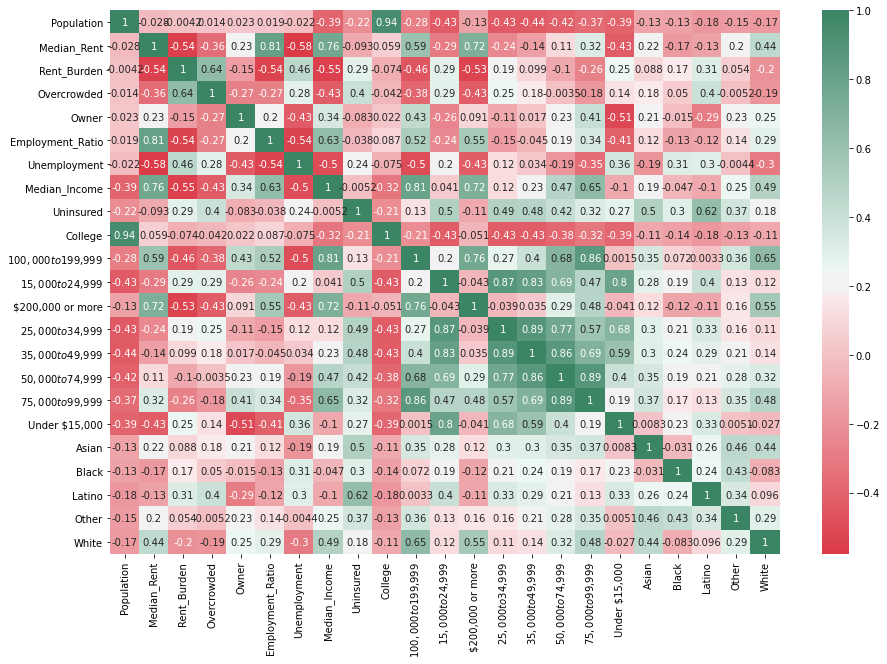

In [51]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
corrMatrix = data.corr()
plt.figure(figsize=(15,10))
colormap=sn.diverging_palette(10, 150,as_cmap=True)
sn.heatmap(corrMatrix, annot=True, cmap=colormap)
plt.show()

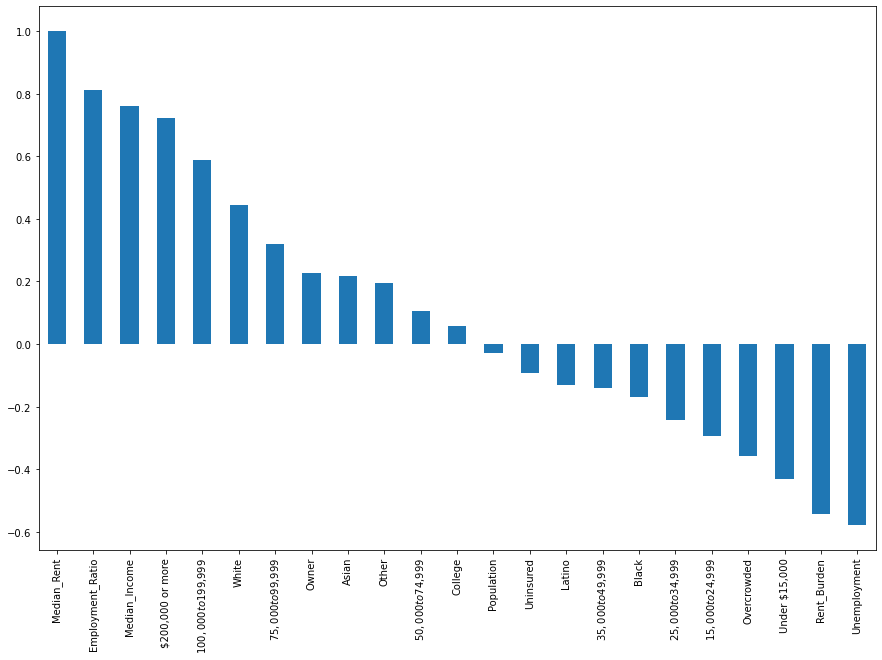

In [52]:
corrMatrix['Median_Rent'].sort_values(ascending=False).plot.bar(figsize=(15,10))
plt.show()

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ['Median_Rent','Employment_Ratio','Median_Income','$200,000 or more','Rent_Burden','Unemployment']
scatter_matrix(df[attributes], figsize=(15,10))
plt.show()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
col = 'Employment_Ratio'
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
sn.distplot(data[col],hist=True,kde=True,rug=False,label=col,norm_hist=True)
plt.title('Original Median Rent Histogram')
plt.show()

In [ ]:
# Normalize data (length of 1)
from sklearn.preprocessing import Normalizer
import pandas
import numpy
array = df[df.columns[3:]].fillna(0).values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
# summarize transformed data
np.set_printoptions(precision=3)
print(normalizedX[0:5,:])

In [ ]:
# Finding outliers
data = df[df.columns[3:]].fillna(0)
# scale values from 0 to 20 in order to better visualize
data=dataf=((data-data.min())/(data.max()-data.min()))*20
data.boxplot(grid=False, fontsize=15, figsize=(15,6))
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Caclulate Z-score
import numpy as np
from scipy.stats import zscore
z = np.abs(zscore(data))
print('Z-score:', z)


In [ ]:
data.head()

In [ ]:
print('Scaled:', data.shape)
print('Z-score Cleaned:', data[(z<3).all(axis=1)].shape)
print('IQR Cleaned:', data[~((data < lowerRange) | (data > higherRange) ).any(axis=1)].shape)

In [ ]:
# Calculate Inter Quartile Range (IQR)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1
lowerRange = (Q1 - 1.5 * IQR)
higherRange= (Q1 + 1.5 * IQR)
print('lowerRange:\n', lowerRange, '\n')
print('higherRange:\n', higherRange, '\n')
print(IQR)


In [ ]:
data.sample(5)

### Multiple Line Regression

In [53]:
print(df.shape)
df.columns

(910, 26)


Index(['TimeFrame', 'Fips', 'Location', 'Population', 'Median_Rent',
       'Rent_Burden', 'Overcrowded', 'Owner', 'Employment_Ratio',
       'Unemployment', 'Median_Income', 'Uninsured', 'College',
       '$100,000 to $199,999', '$15,000 to $24,999', '$200,000 or more',
       '$25,000 to $34,999', '$35,000 to $49,999', '$50,000 to $74,999',
       '$75,000 to $99,999', 'Under $15,000', 'Asian', 'Black', 'Latino',
       'Other', 'White'],
      dtype='object')

In [54]:
features = ['TimeFrame','Location','Median_Income','Employment_Ratio','$200,000 or more','White','Unemployment','Rent_Burden','Median_Rent']
d = df[features].fillna(0).drop_duplicates().reset_index(drop=True)
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910 entries, 0 to 909
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TimeFrame         910 non-null    int64  
 1   Location          910 non-null    object 
 2   Median_Income     910 non-null    float64
 3   Employment_Ratio  910 non-null    float64
 4   $200,000 or more  910 non-null    float64
 5   White             910 non-null    float64
 6   Unemployment      910 non-null    float64
 7   Rent_Burden       910 non-null    float64
 8   Median_Rent       910 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 64.1+ KB


In [55]:
d=pd.get_dummies(d)
X = d.drop(['Median_Rent'], axis=1)
y = d['Median_Rent'].values.reshape(-1, 1)
print(X.shape, y.shape)

(910, 72) (910, 1)


In [56]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [57]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(x_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(x_train)
X_test_scaled = X_scaler.transform(x_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [58]:
features=d.columns
#print('features: ', features)
#print()
reg=linear_model.LinearRegression()
reg.fit(X_train_scaled,y_train_scaled)
pred=reg.predict(X_test_scaled)
print()
mean_squared_error=metrics.mean_squared_error(y_test_scaled,pred)
print('mean squared error(MSE)', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(reg.score(X_train_scaled,y_train_scaled),3))
print('R squared testing', round(reg.score(X_test_scaled,y_test_scaled),3))
print('Intercept: ', reg.intercept_)
print('Coefficient:', reg.coef_)


mean squared error(MSE) 0.17
R squared training 0.973
R squared testing 0.974
Intercept:  [3.144e-06]
Coefficient: [[ 1.657e-01  6.674e-01  1.191e-02  8.268e-02  6.231e-02  7.566e-03
   4.583e-02 -8.492e+09 -7.692e+09 -8.864e+09 -8.103e+09 -9.219e+09
  -8.492e+09 -8.103e+09 -8.492e+09 -8.103e+09 -8.492e+09 -8.103e+09
  -8.864e+09 -9.560e+09 -8.103e+09 -8.492e+09 -8.864e+09 -8.492e+09
  -8.492e+09 -8.492e+09 -8.492e+09 -8.864e+09 -8.864e+09 -8.103e+09
  -8.492e+09 -8.864e+09 -8.492e+09 -8.492e+09 -7.692e+09 -8.864e+09
  -9.219e+09 -8.103e+09 -7.257e+09 -9.560e+09 -6.793e+09 -8.864e+09
  -8.103e+09 -9.560e+09 -8.492e+09 -8.103e+09 -8.492e+09 -8.492e+09
  -9.219e+09 -8.492e+09 -8.864e+09 -8.864e+09 -9.219e+09 -9.219e+09
  -8.492e+09 -8.103e+09 -9.560e+09 -9.219e+09 -8.492e+09 -8.864e+09
  -8.492e+09 -8.864e+09 -6.294e+09 -8.864e+09 -8.103e+09 -9.219e+09
  -7.692e+09 -7.692e+09 -8.864e+09 -8.492e+09 -9.560e+09 -8.864e+09]]


In [ ]:
from sklearn import linear_model
import statsmodels.api as sm

In [ ]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X_train_scaled, y_train_scaled)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y_train_scaled, X_train_scaled).fit()
predictions = model.predict(X_train_scaled) 
 
print_model = model.summary()
print(print_model)

#### Feedback for MVP
- Random Tree ( Neural Networks )
- Pick Better Features
- Feature Engineering (Percent Change)
- Use cross validation

### Random Forest Tree

In [59]:
print(sorted(set(df.TimeFrame.tolist())))
df.columns

[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]


Index(['TimeFrame', 'Fips', 'Location', 'Population', 'Median_Rent',
       'Rent_Burden', 'Overcrowded', 'Owner', 'Employment_Ratio',
       'Unemployment', 'Median_Income', 'Uninsured', 'College',
       '$100,000 to $199,999', '$15,000 to $24,999', '$200,000 or more',
       '$25,000 to $34,999', '$35,000 to $49,999', '$50,000 to $74,999',
       '$75,000 to $99,999', 'Under $15,000', 'Asian', 'Black', 'Latino',
       'Other', 'White'],
      dtype='object')

In [60]:
#columns = ['TimeFrame','Location','Rent','Median_Income','Rent_Burden','Employment_Ratio','Overcrowded','Education_Pct']
#tree = df[df.Fips < 1000][columns].dropna()
tree = df.drop(['Location','Fips'],axis=1).dropna().reset_index(drop=True).copy()
tree = d.copy()
#tree = tree[tree.TimeFrame <= 2015]
print(sorted(set(tree.TimeFrame.tolist())))
print(tree.shape)
tree.head()

[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
(910, 73)


,TimeFrame,Median_Income,Employment_Ratio,"$200,000 or more",White,Unemployment,Rent_Burden,Median_Rent,Location_Astoria,Location_Battery Park/Tribeca,...,Location_Throgs Neck,Location_Tottenville,Location_Unionport/Soundview,Location_University Heights,Location_Upper East Side,Location_Upper West Side,Location_Washington Heights,Location_Williamsbridge,Location_Williamsburg/Greenpoint,Location_Woodhaven
0,2005,116703.49427,0.751,5041.99061,0.0,0.033,0.17644,2191.21645,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2005,116703.49427,0.751,7443.00939,0.0,0.033,0.17644,2191.21645,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2005,40241.54525,0.564,1723.00000,0.0,0.088,0.23809,817.19484,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2005,88613.25358,0.677,7497.55516,0.0,0.066,0.19318,1781.33008,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2005,88613.25358,0.677,3752.44484,0.0,0.066,0.19318,1781.33008,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910 entries, 0 to 909
Data columns (total 73 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   TimeFrame                           910 non-null    int64  
 1   Median_Income                       910 non-null    float64
 2   Employment_Ratio                    910 non-null    float64
 3   $200,000 or more                    910 non-null    float64
 4   White                               910 non-null    float64
 5   Unemployment                        910 non-null    float64
 6   Rent_Burden                         910 non-null    float64
 7   Median_Rent                         910 non-null    float64
 8   Location_Astoria                    910 non-null    uint8  
 9   Location_Battery Park/Tribeca       910 non-null    uint8  
 10  Location_Bay Ridge                  910 non-null    uint8  
 11  Location_Bayside                    910 non-n

In [62]:
# Descriptive statistics for each column
tree.describe()

,TimeFrame,Median_Income,Employment_Ratio,"$200,000 or more",White,Unemployment,Rent_Burden,Median_Rent,Location_Astoria,Location_Battery Park/Tribeca,...,Location_Throgs Neck,Location_Tottenville,Location_Unionport/Soundview,Location_University Heights,Location_Upper East Side,Location_Upper West Side,Location_Washington Heights,Location_Williamsbridge,Location_Williamsburg/Greenpoint,Location_Woodhaven
count,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,...,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000
mean,2011.500000,53849.357718,0.572327,3517.764093,30242.220879,0.087618,0.276816,1259.851653,0.015385,0.015385,...,0.015385,0.015385,0.015385,0.015385,0.015385,0.015385,0.015385,0.015385,0.015385,0.015385
std,4.033346,30478.792915,0.078024,5806.854944,38629.136245,0.037766,0.058992,374.536356,0.123145,0.123145,...,0.123145,0.123145,0.123145,0.123145,0.123145,0.123145,0.123145,0.123145,0.123145,0.123145
min,2005.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.151750,590.339490,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.000000,35925.914735,0.535000,505.750000,0.000000,0.059620,0.232268,1031.403048,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2011.500000,51660.306555,0.570500,1695.000000,10556.500000,0.081075,0.278285,1174.658355,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2015.000000,67422.750000,0.609000,3523.000000,51637.500000,0.110000,0.319450,1363.216000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2018.000000,148152.000000,0.751000,37048.000000,187024.000000,0.235860,0.464850,2695.332190,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
# one-hot encode the data
trees = pd.get_dummies(tree)

print(trees.shape)

# display the first 5 rows of the last 12 columns
trees.iloc[:,5:].head(5)

(910, 73)


,Unemployment,Rent_Burden,Median_Rent,Location_Astoria,Location_Battery Park/Tribeca,Location_Bay Ridge,Location_Bayside,Location_Bedford Park,Location_Bedford Stuyvesant,Location_Bensonhurst,...,Location_Throgs Neck,Location_Tottenville,Location_Unionport/Soundview,Location_University Heights,Location_Upper East Side,Location_Upper West Side,Location_Washington Heights,Location_Williamsbridge,Location_Williamsburg/Greenpoint,Location_Woodhaven
0,0.033,0.17644,2191.21645,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.033,0.17644,2191.21645,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.088,0.23809,817.19484,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.066,0.19318,1781.33008,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.066,0.19318,1781.33008,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
trees.head()

### Features and Targets and Convert Data to Arrays

In [64]:
import numpy as np

# Labels are the values we want to predict
target = np.array(trees['Median_Rent'])
#target = trees['Median_Rent']

# Remove the labels from the features
# axis 1 refers to the columns
#data = trees.drop('Median_Rent', axis=1)
data = trees.drop('Median_Rent', axis=1)

# Saving feature names for later use
feature_list = list(data.columns)

# Convert to numpy array
data = np.array(data)

In [65]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(data, target, test_size=0.2, random_state=42)

In [66]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (728, 72)
Training Labels Shape: (728,)
Testing Features Shape: (182, 72)
Testing Labels Shape: (182,)


#### Establish Baseline

In [67]:
# The baseline predictions are the median income
baseline_preds = test_features[:, feature_list.index('Median_Income')]

# Baseline errors, and display income baseline error
baseline_errors = abs(baseline_preds - test_labels)

print('Income baseline error: ', round(np.mean(baseline_errors),2))

Income baseline error:  51637.14


### Train Model

In [68]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(train_features)
y_scaler = StandardScaler().fit(train_labels.reshape(-1,1))

train_features_scaled = X_scaler.transform(train_features)
test_features_scaled = X_scaler.transform(test_features)
train_labels_scaled = y_scaler.transform(train_labels.reshape(-1,1))
test_labels_scaled = y_scaler.transform(test_labels.reshape(-1,1))

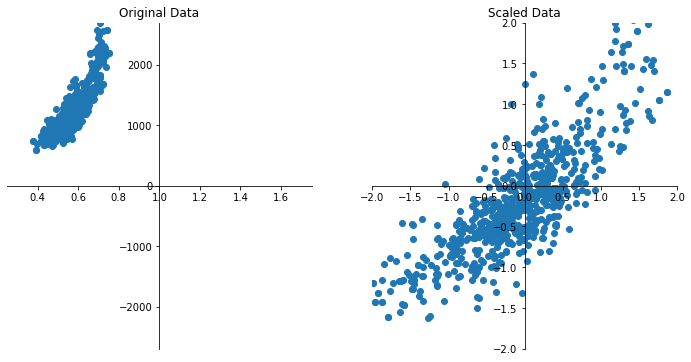

In [69]:
col=feature_list.index('Employment_Ratio')
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = train_features[:,col].max()
maxy = train_labels.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(train_features[:,col], train_labels)
axes2.scatter(train_features_scaled[:,col], train_labels_scaled)

plt.show()

In [70]:
def print_scores(scores):
    print('Scores', scores)
    print('Mean:', scores.mean())
    print('Standard Deviation:', scores.std())

In [71]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators=1000, random_state=42)

# Train the model on training data
rf.fit(train_features, train_labels)


RandomForestRegressor(n_estimators=1000, random_state=42)

In [72]:
sorted(zip(rf.feature_importances_[1:7], feature_list[1:7]), reverse=True)

[(0.8044142149505742, 'Employment_Ratio'),
 (0.084113603181617, 'Median_Income'),
 (0.017243544901774866, 'White'),
 (0.016499240162679597, 'Unemployment'),
 (0.01268598162703191, 'Rent_Burden'),
 (0.012360161004631621, '$200,000 or more')]

### Make a prediction on the Test Set

In [73]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

rf_mse = mean_squared_error(test_labels, predictions)
rf_rmse = np.sqrt(rf_mse)

# Print out the mean absolute error (mae)
print('Mean Absolute Error (MAE):', round(np.mean(errors),2))
print('Root Mean Square Error (RMSE):', round(rf_rmse,2))

rf_rmse_scores = np.sqrt(-cross_val_score(rf, train_features, train_labels, scoring='neg_mean_squared_error', cv=10))
print_scores(rf_rmse_scores)

Mean Absolute Error (MAE): 54.25
Root Mean Square Error (RMSE): 72.21
Scores [83.164 92.903 92.119 78.757 64.931 72.152 99.335 81.789 88.623 80.149]
Mean: 83.39222913725698
Standard Deviation: 9.746423647682745


### Determine Performance Metrics

In [74]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels )

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%')


Accuracy: 95.49 %


### Visualize a Single Decision Tree

In [76]:
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
t = rf.estimators_[5]

# Export the image to a dot file
export_graphviz(t, out_file='tree.dot', feature_names=feature_list, rounded=True, precision=1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png')

In [77]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)

# Extract the small tree
tree_small = rf_small.estimators_[5]

# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');


### Variable Importances

In [78]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse=True)

# Print out the feature and importances
[ print('Variable: {:20} Importances: {}'.format(*pair)) for pair in feature_importances[:7]]

Variable: Employment_Ratio     Importances: 0.8
Variable: Median_Income        Importances: 0.08
Variable: TimeFrame            Importances: 0.02
Variable: White                Importances: 0.02
Variable: Unemployment         Importances: 0.02
Variable: $200,000 or more     Importances: 0.01
Variable: Rent_Burden          Importances: 0.01


[None, None, None, None, None, None, None]

In [80]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Extract the six most important features
important_indices = [
    feature_list.index('Employment_Ratio'),
    feature_list.index('Median_Income'), 
    feature_list.index('$200,000 or more'),
    feature_list.index('White'),
    feature_list.index('Unemployment'),
    feature_list.index('Rent_Burden')
]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

# Train the random forest
rf_most_important.fit(train_important, train_labels)

# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)

# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2))
mape = np.mean(100 * (errors / test_labels))

rf_mse = mean_squared_error(test_labels, predictions)
rf_rmse = np.sqrt(rf_mse)
print('Root Mean Square Error (RMSE):', round(rf_rmse,2))

accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%')

Mean Absolute Error: 66.92
Root Mean Square Error (RMSE): 86.03
Accuracy: 94.44 %


### Visualizations

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline

# Set the style
plt.style.use('fivethirtyeight')

### Variable Importances Bar Chart

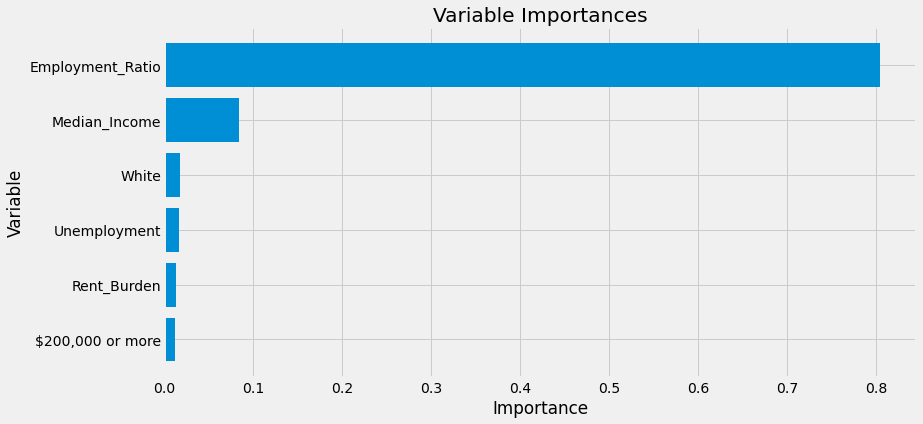

In [82]:
# list of x locations for plotting

x_values = list(range(len(importances[1:7])))

plt.figure(figsize=(12,6))
# Make a bar chart
plt.barh(x_values, [ item[0] for item in sorted(zip(rf.feature_importances_[1:7], feature_list[1:7]), reverse=False) ], orientation = 'horizontal')

# Tick labels for x axis
plt.yticks(x_values, [ item[1] for item in sorted(zip(rf.feature_importances_[1:7], feature_list[1:7]), reverse=False) ], rotation='horizontal')

# Axis labels and title
plt.ylabel('Variable')
plt.xlabel('Importance')
plt.title('Variable Importances')

plt.show()

### Plot Entire Dataset with Predictions Highlighted

In [83]:
features = d[[*d.columns[:7].tolist(),'Median_Rent']].values
labels = d['Median_Rent'].values

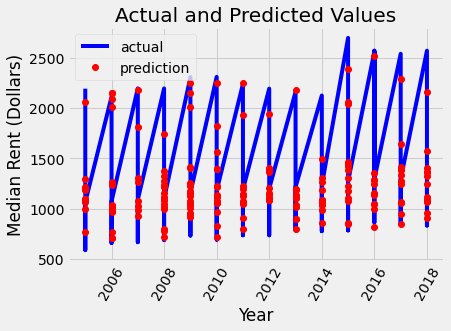

In [84]:
# Use datetime for creating date objects for plotting
import datetime

# Dates of training values
#months = features[:, feature_list.index('month')]
#days = features[:, feature_list.index('day')]
years = features[:, feature_list.index('TimeFrame')]

# List and then convert to datetime object
#dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [str(int(year)) for year in years]
dates = [datetime.datetime.strptime(date, '%Y') for date in dates]

# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})

# Dates of predictions
#months = test_features[:, feature_list.index('month')]
#days = test_features[:, feature_list.index('day')]
years = test_features[:, feature_list.index('TimeFrame')]

# Column of dates
#test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
test_dates = [str(int(year)) for year in years]

# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y') for date in test_dates]

# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})

# Plot the actual values
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')

# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60')
plt.legend()

# Graph labels
plt.xlabel('Year')
plt.ylabel('Median Rent (Dollars)')
plt.title('Actual and Predicted Values')
plt.show()


In [ ]:
# Make the data accessible for plotting
true_data['Median_Income'] = features[:, feature_list.index('Median_Income')]
true_data['Rent_Burden'] = features[:, feature_list.index('Rent_Burden')]
true_data['Employment_Ratio'] = features[:, feature_list.index('Employment_Ratio')]

# Plot all the data as lines
plt.plot(true_data['date'], true_data['actual'], 'b-', label  = 'Actual', alpha = 1.0)
plt.plot(true_data['date'], true_data['Median_Income'], 'y-', label  = 'Median_Income', alpha = 1.0)
plt.plot(true_data['date'], true_data['Rent_Burden'], 'k-', label = 'Rent_Burden', alpha = 0.8)
plt.plot(true_data['date'], true_data['Employment_Ratio'], 'r-', label = 'Employment_Ratio', alpha = 0.3)

# Formatting plot
plt.legend()
plt.xticks(rotation = '60')

# Lables and title
plt.xlabel('Year')
plt.ylabel('Median Rent (Dollars)')
plt.title('Actual Median Rent and Variables')

plt.show()

### Fine-Tune the Model

In [89]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [10, 50, 100, 1000], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [10, 50], 'max_features': [2, 3, 4]}
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, 
                           param_grid, 
                           cv=5, 
                           scoring='neg_mean_squared_error', 
                           return_train_score=True)

grid_search.fit(features, labels)

print(grid_search.best_params_)
print(grid_search.best_estimator_)
print()

# Evaluation Scores
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score),params)

{'max_features': 8, 'n_estimators': 10}
RandomForestRegressor(max_features=8, n_estimators=10)

62.75542708059859 {'max_features': 2, 'n_estimators': 10}
53.798672310834476 {'max_features': 2, 'n_estimators': 50}
51.020271637340024 {'max_features': 2, 'n_estimators': 100}
50.00353773942943 {'max_features': 2, 'n_estimators': 1000}
36.40333112387875 {'max_features': 4, 'n_estimators': 10}
29.25314756009792 {'max_features': 4, 'n_estimators': 50}
29.03680281122818 {'max_features': 4, 'n_estimators': 100}
28.882548828602594 {'max_features': 4, 'n_estimators': 1000}
22.344202786311694 {'max_features': 6, 'n_estimators': 10}
19.995853160913573 {'max_features': 6, 'n_estimators': 50}
18.951585067820933 {'max_features': 6, 'n_estimators': 100}
19.21496993544102 {'max_features': 6, 'n_estimators': 1000}
12.955400003514262 {'max_features': 8, 'n_estimators': 10}
14.882905684995688 {'max_features': 8, 'n_estimators': 50}
14.56468290039224 {'max_features': 8, 'n_estimators': 100}
14.5485410016577